In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('../data/data_clean_1.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,21.934911,12,E10,0,0,0
1,12,"4,2",30,21.934911,13,E10,0,0,0
2,"11,2","5,5",38,21.934911,15,E10,0,0,0
3,"12,9","3,9",36,21.934911,14,E10,0,0,0
4,"18,5","4,5",46,21.934911,15,E10,0,0,0


In [4]:
data['consume'] = data['consume'].str.replace(',', '.')
data['consume'] = pd.to_numeric(data['consume'], errors='coerce')
data['consume'].unique()

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

In [5]:
data['distance'] = data['distance'].str.replace(',', '.')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data['distance'].unique()

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

## Train test split

In [6]:
X = data.drop(['gas_type'],axis=1)
y = data['gas_type']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(271, 8)
(117, 8)
(271,)
(117,)


In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

## Checking for the best measurements

In [9]:
def plot_k(X_train, X_test, y_train, y_test, max_k=20):
    '''
    Creates a plot with the r2-score on the y-axis and
    the k-value on th x-axis to determine the best k-value.
    
    Args:
        X_train: Independent variables of the training set
        X_test:  Dependent variables of the training set
        y_train: Independent variables of the test set
        y_test:  Dependent variable of the test set
        max_k:   Maximal k value to exermine
    '''
    
    scores = []
    
    for k in range(2,max_k+1):
        mod = KNeighborsClassifier(n_neighbors=k, weights="distance") # p: int, weights: {"uniform","distance"}
        mod.fit(X_train, y_train)
        score = mod.score(X_test, y_test)
        scores.append(score)
        
    plt.figure(figsize=(5,3))
    plt.plot(range(2, max_k+1), scores, color='blue',
            marker='o', markerfacecolor='red', markersize=10)
    plt.title('precision vs. K-value')
    plt.xticks(range(1, max_k+1))
    plt.xlabel('k')
    plt.ylabel('precision')

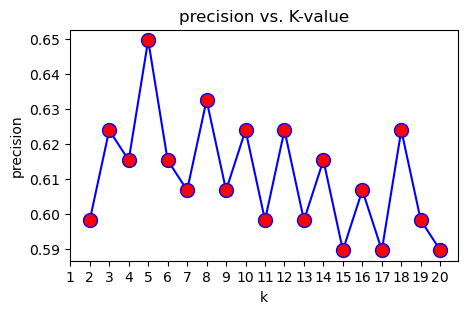

In [10]:
plot_k(X_train_std, X_test_std, y_train, y_test)

## Applying the best k

In [11]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(weights='distance')

In [12]:
y_test_pred = knn.predict(X_test_std)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         E10       0.57      0.53      0.55        47
        SP98       0.70      0.73      0.71        70

    accuracy                           0.65       117
   macro avg       0.63      0.63      0.63       117
weighted avg       0.65      0.65      0.65       117



In [13]:
from sklearn.metrics import cohen_kappa_score

In [14]:
y_test_pred = knn.predict(X_test_std)
print(cohen_kappa_score(y_test,y_test_pred))

0.26324681308554754


In [16]:
data.to_csv('../data/data_for_predictions', index=False)